<center>

<h1>Master en Management & Analytics</h1>
</center>

            

### Alumno: Priolo Juan
#### Notebook 2 - Análisis Exploratorio del dataset

# <span style="color:blue"> Introducción 

En esta **Notebook** se llevará a cabo proceso exploratorio del dataset para en futuras instancias predecir propiedades del acero trefilado utilizando diferentes modelos de **Machine Learning**. 

**Objetivos generales del proyecto:**

a) Análisis Exploratorio de los datos que nos permitirá una mejor interpretación de la información
b) Comparar diferentes modelos de Machine Learning utilizando diferentes métricas para ellos (MSE y R2)

A continuación se irán describiendo diferentes etapas.

## <span style="color:blue"> Etapa 1 - Estadística descriptiva - Análisis exploratorio de los datos (EDA)

Importando el DATASET, analizaremos la información

#### 0.a) - Importamos a continuación el DATASET generado en la NOTEBOOK 1

#####  file_path = 'C:/Users/60056808/Desktop/Trabajo Final Magister/TP final Maestria MMA/3. Programa Python en Jupyter/Datos/DATASET.csv' 



In [65]:
import pandas as pd

# Ruta al archivo .csv
#file_path = 'C:/Users/60056808/Desktop/Trabajo Final Magister/TP final Maestria MMA/3. Programa Python en Jupyter/Datos/DATASET.csv'

file_path = 'C:/Users/60056808/Desktop/Trabajo Final Magister/TP final Maestria MMA/Jupyter avances/data/dataset_final.csv'

# Leer el archivo .csv
DATASET = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
DATASET.head(10)

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Nb + Ta,Temperatura (°C),Rotura (MPa),Alargamiento (%),Reducción de área (%),Fluencia (MPa)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,27,490,30,71,342
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,100,454,27,72,338
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,200,465,23,69,337
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,300,495,21,70,346
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,400,489,26,79,316
5,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,450,461,25,81,287
6,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,500,431,28,85,274
7,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,550,387,32,87,262
8,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,600,314,42,88,220
9,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,650,226,59,92,152


In [66]:
DATASET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   C                      909 non-null    float64
 1   Si                     909 non-null    float64
 2   Mn                     909 non-null    float64
 3   P                      909 non-null    float64
 4   S                      909 non-null    float64
 5   Ni                     909 non-null    float64
 6   Cr                     909 non-null    float64
 7   Mo                     909 non-null    float64
 8   Cu                     909 non-null    float64
 9   V                      909 non-null    float64
 10  Al                     909 non-null    float64
 11  N                      909 non-null    float64
 12  Nb + Ta                909 non-null    float64
 13  Temperatura (°C)       909 non-null    int64  
 14  Rotura (MPa)           909 non-null    int64  
 15  Alarga

In [68]:
description = DATASET.describe().transpose()
description['median'] = DATASET.apply(lambda x: x.median(), axis=0)
description['CV'] = description.apply(lambda x: 100*(x['std']/x['mean']), axis=1)
description = description[['mean','median','std','min','max','25%','50%','75%']]
description

,mean,median,std,min,max,25%,50%,75%
C,0.174587,0.1600,0.059495,0.0900,0.3400,0.1300,0.1600,0.200
Si,0.310748,0.3000,0.086686,0.1800,0.5200,0.2400,0.3000,0.370
Mn,0.812607,0.6800,0.343139,0.4200,1.4800,0.5000,0.6800,1.210
P,0.014562,0.0140,0.005249,0.0060,0.0300,0.0100,0.0140,0.018
S,0.010607,0.0100,0.004027,0.0030,0.0220,0.0080,0.0100,0.012
Ni,0.142321,0.0500,0.172515,0.0000,0.6000,0.0230,0.0500,0.210
Cr,0.424635,0.1100,0.456160,0.0000,1.3100,0.0400,0.1100,0.990
Mo,0.439578,0.5000,0.392051,0.0050,1.3500,0.0500,0.5000,0.560
Cu,0.079098,0.0700,0.058600,0.0000,0.2500,0.0400,0.0700,0.110
V,0.059124,0.0000,0.095659,0.0000,0.3000,0.0000,0.0000,0.070


In [69]:
DATASET.dtypes

C                        float64
Si                       float64
Mn                       float64
P                        float64
S                        float64
Ni                       float64
Cr                       float64
Mo                       float64
Cu                       float64
V                        float64
Al                       float64
N                        float64
Nb + Ta                  float64
Temperatura (°C)           int64
Rotura (MPa)               int64
Alargamiento (%)           int64
Reducción de área (%)      int64
Fluencia (MPa)             int64
dtype: object

In [70]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

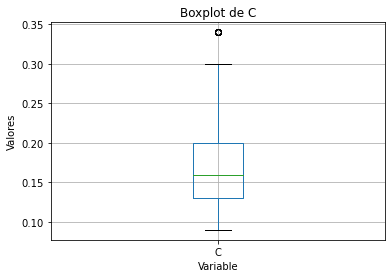

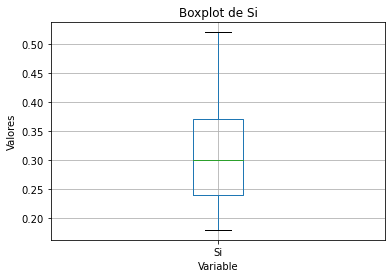

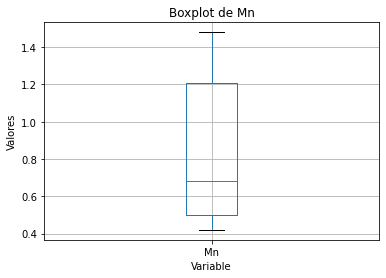

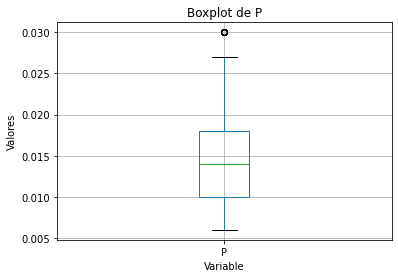

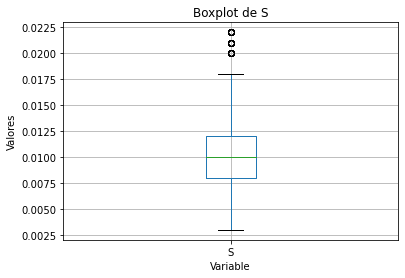

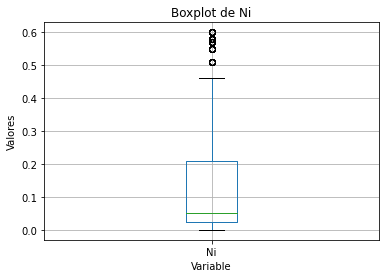

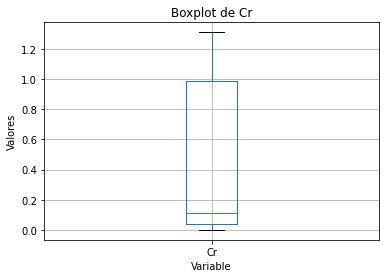

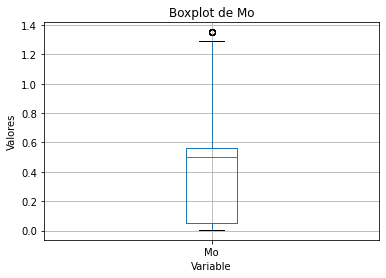

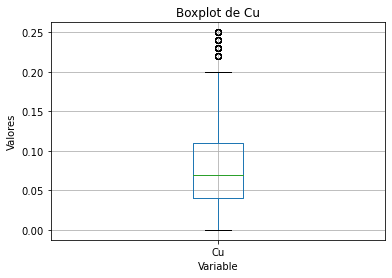

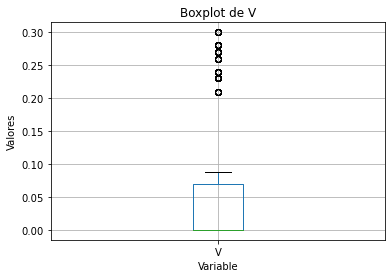

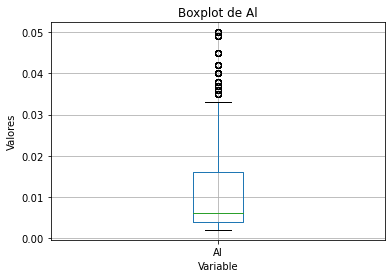

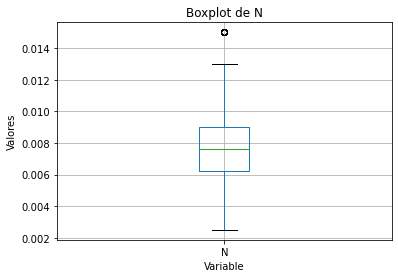

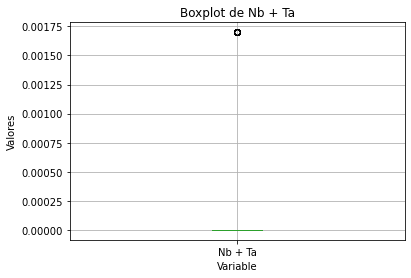

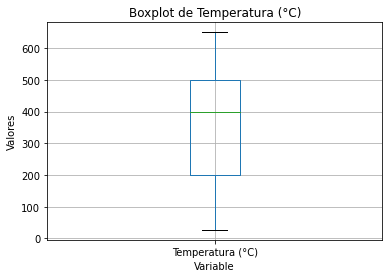

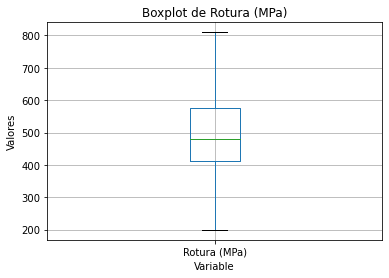

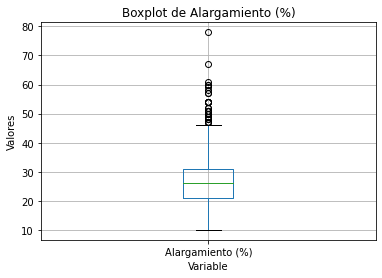

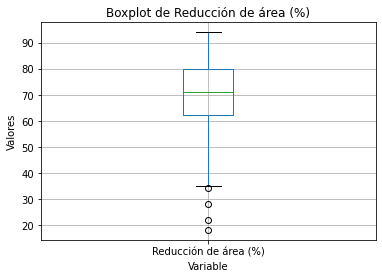

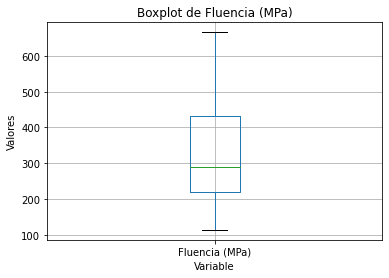

In [71]:
### Genero un boxplot por cada una de las variables
for column in DATASET.columns:
    plt.figure()
    DATASET.boxplot(column=[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel('Variable')
    plt.ylabel('Valores')
    plt.show()

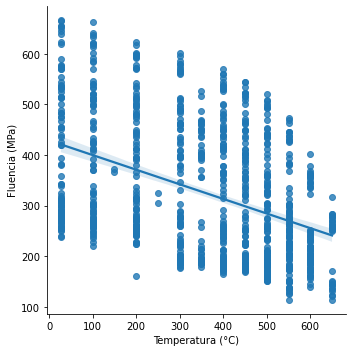

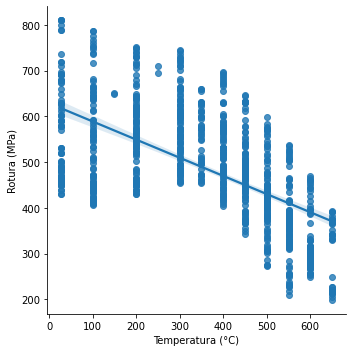

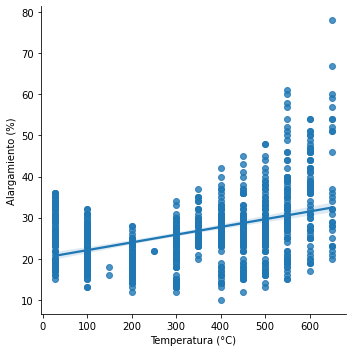

In [72]:
# Realizamos algunas visualizaciones

ax = sns.lmplot(x = 'Temperatura (°C)', y = 'Fluencia (MPa)', data=DATASET)#, hue='Temperatura (°C)', palette='Set2')
ax = sns.lmplot(x = 'Temperatura (°C)', y = 'Rotura (MPa)', data=DATASET)#, hue='Temperatura (°C)', palette='Set2')
ax = sns.lmplot(x = 'Temperatura (°C)', y = 'Alargamiento (%)', data=DATASET)#, hue='Temperatura (°C)', palette='Set2')


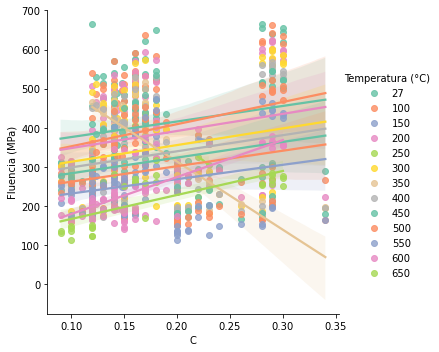

In [73]:
#ax = sns.lmplot(x = 'Mn', y = 'Fluencia (MPa)', data=DATASET, hue='Temperatura (°C)', palette='Set1')
ax = sns.lmplot(x = 'C', y = 'Fluencia (MPa)', data=DATASET, hue='Temperatura (°C)', palette='Set2')
#ax = sns.lmplot(x = 'C', y = 'Mn', data=DATASET, hue='Temperatura (°C)', palette='Set3')

In [74]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


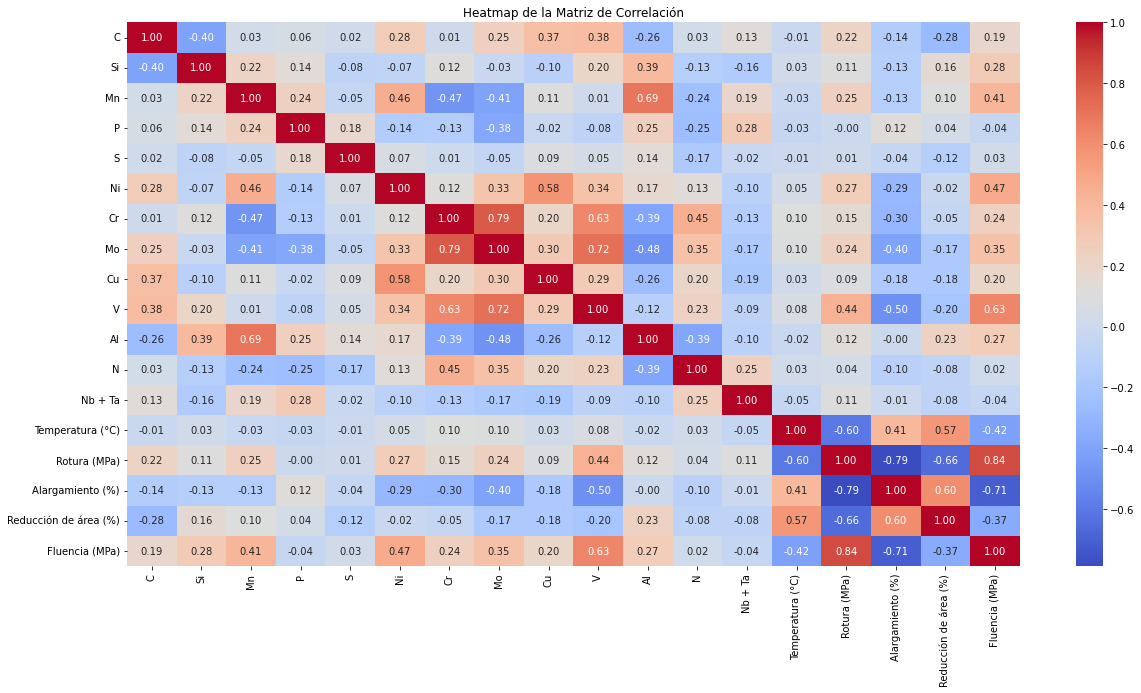

In [75]:
# Crear una matriz de correlación
corr_matrix = DATASET.corr()

# Crear el heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Título del heatmap
plt.title('Heatmap de la Matriz de Correlación')

# Mostrar el gráfico
plt.show()

In [76]:
# Seleccionar las columnas de interés
# variables_of_interest = ['Ceq', 'C', 'Manganeso Obt. (%)', 'Molibdeno Obt. (%)','Niobio Obt. (%)','Tratamiento','Fluencia (Mpa)']  # Reemplaza con tus columnas de interés
# dataset_selected = DATASET[variables_of_interest]

# Crear una matriz de correlación para las variables de interés
#corr_matrix =  DATASET()

# Crear el heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Título del heatmap
#plt.title('Heatmap de la Matriz de Correlación para Variables de Interés')

# Mostrar el gráfico
#plt.show()

In [77]:
#Seleccionar variables de interes
#variables_of_interest = ['Ceq', 'C', 'Mn', 'Mo','Temperatura (°C)','Fluencia (MPa)']  # Reemplaza con tus columnas de interés
#dataset_selected = DATASET[variables_of_interest]

# Crear el pairplot
#sns.pairplot(dataset_selected)

# Título del pairplot
#plt.suptitle('Pairplot de las Variables de Interés', y=1.02)

# Mostrar el gráfico
#plt.show()

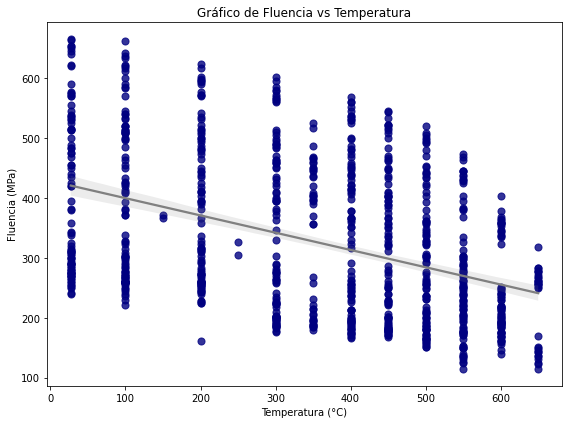

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATASET = pd.DataFrame(DATASET)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.regplot(x='Temperatura (°C)', y='Fluencia (MPa)', data=DATASET, color='navy', scatter_kws={'s': 50}, line_kws={'color': 'grey'})


# Títulos y etiquetas
plt.title('Gráfico de Fluencia vs Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Fluencia (MPa)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


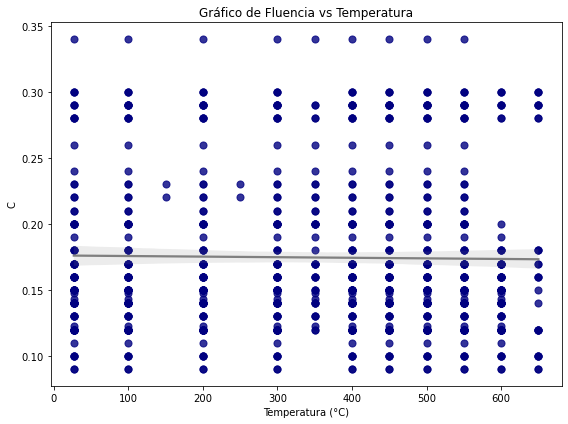

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATASET = pd.DataFrame(DATASET)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.regplot(x='Temperatura (°C)', y='C', data=DATASET, color='navy', scatter_kws={'s': 50}, line_kws={'color': 'grey'})


# Títulos y etiquetas
plt.title('Gráfico de Fluencia vs Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('C')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [81]:
DATASET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   C                      909 non-null    float64
 1   Si                     909 non-null    float64
 2   Mn                     909 non-null    float64
 3   P                      909 non-null    float64
 4   S                      909 non-null    float64
 5   Ni                     909 non-null    float64
 6   Cr                     909 non-null    float64
 7   Mo                     909 non-null    float64
 8   Cu                     909 non-null    float64
 9   V                      909 non-null    float64
 10  Al                     909 non-null    float64
 11  N                      909 non-null    float64
 12  Nb + Ta                909 non-null    float64
 13  Temperatura (°C)       909 non-null    int64  
 14  Rotura (MPa)           909 non-null    int64  
 15  Alarga